# Trained on FairSIM, Testing on Opstad

Written by: Bereket Kebede <br> 
Last updated: June 28, 2023 <br>

In [1]:
#############################################
# import neceassry libraries

import numpy as np
import os
import matplotlib.pyplot as plt
from skimage import io
import skimage.io
import skimage.util
from tifffile import imsave
from sklearn.preprocessing import MinMaxScaler
import scipy.ndimage
from skimage.measure import profile_line
import matplotlib.patches as patches

scaler = MinMaxScaler()

In [2]:
def normalize_volume(image):
    clipped_data = image.copy() 
    clipped_data[clipped_data<0] = 0   # thresholding
    apodized_data = clipped_data - np.min(clipped_data)
    norm_3D_data = apodized_data/np.max(apodized_data)
    return norm_3D_data

In [3]:
os.getcwd()

'E:\\Bereket\\Research\\DeepLearning - 3D\\Thesis\\Results\\Trained on FairSIM Tested on Opstad'

In [4]:
my_list = UNET_3D, Ground_Truth, UNET_2D, Fair_SIM, Wide_Field = [r"E:\Bereket\Research\DeepLearning - 3D\Data\Data_3D_21\add\config_4\full\UNet_SIM3_3D_Data_3D_21_epoch_2000_batch_8_lr_ryan_0.0001\Stitched_pred_stitched.tif",
                                                                  r"E:\Bereket\Research\DeepLearning - 3D\Data\Data_pre_processed\Opstad\Live Cell\016\ground_truth_016.tif",
                                                                  r"E:\Bereket\Research\DeepLearning - 3D\Data\Data_2D_21\add\config_2\full\UNet_SIM_3_epoch_2000_batch_8_lr_0.001_luhong\pred_stitched.tif",
                                                                  r"E:\Bereket\Research\DeepLearning - 3D\Data\Data_pre_processed\Opstad\Live Cell\016\fairSIM_016.tif",
                                                                  r"E:\Bereket\Research\DeepLearning - 3D\Data\Data_pre_processed\Opstad\Live Cell\016\wide_field_016.tif"]

In [5]:
second_list = []
for i in my_list:
    second_list.append(io.imread(i))

In [38]:
my_axis = io.imread(r"new_axis_512.png")
my_z_axis = io.imread(r"150_X_150_axis.png")

In [39]:
for i in second_list:
    print(i.shape)

(18, 512, 512)
(18, 512, 512)
(18, 512, 512)
(18, 512, 512)
(18, 1024, 1024)


In [40]:
second_list[0] = second_list[0][0:18,:,:]
second_list[1] = scipy.ndimage.zoom(second_list[1][0:9,:,:], zoom = (2,1,1), order =1)
second_list[3] = scipy.ndimage.zoom(second_list[3][0:9,:,:], zoom = (2,1,1), order =1)
second_list[4] = scipy.ndimage.zoom(second_list[4][0:9,:,:], zoom = (2,2,2), order =1)

In [41]:
for i in second_list:
    print(i.shape)

(18, 512, 512)
(18, 512, 512)
(18, 512, 512)
(18, 512, 512)
(18, 2048, 2048)


In [13]:
seconddd_list = []
for i in range(5):
    seconddd_list.append(normalize_volume(second_list[i]))

(266, 410)
(266, 460)


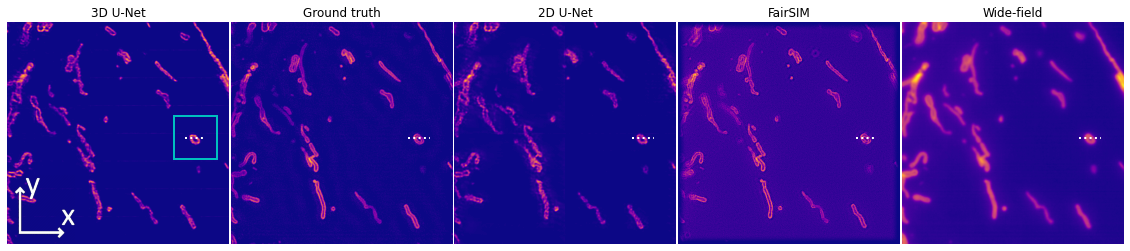

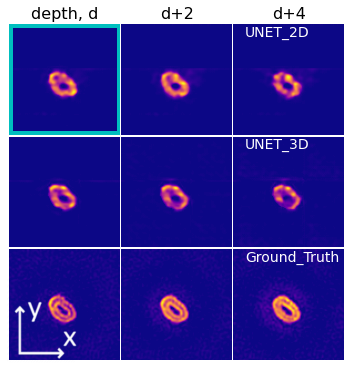

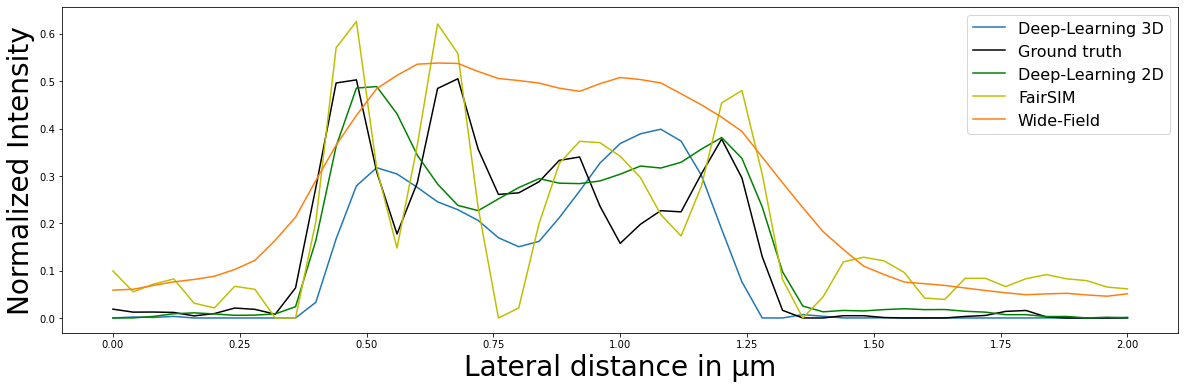

In [69]:
########################################################################
############################################## Normal Figures
columns = 5
rows = 1

# movey from the center
length = 50
move_x = 410
move_y = 10 
slide = 7

# anchor for line
anchor_x = seconddd_list[0][slide,:,:].shape[0]//2 + move_y
anchor_y = move_x
center_x = seconddd_list[0][slide,:,:].shape[0]//2 + move_y
center_y = move_x + length//2

# profile line
start_2 = (anchor_x,move_x)
end_2 = (anchor_x, move_x+length)
fig, ax = plt.subplots(rows, columns, figsize=(20, 10)) # setup the figures
plt.axis('off')

for i in range(5):
    ax[i].imshow(normalize_volume(seconddd_list[i][slide]), cmap = 'plasma')
    ax[i].plot([start_2[1],end_2[1]],[start_2[0],end_2[0]], 'w:', lw=2) #Plot a red line across the film
    #count+=1

rect = patches.Rectangle((move_x-25, 256+move_y-50), 100, 100, linewidth=2, edgecolor='c', facecolor='none')
ax[0].add_patch(rect)
ax[0].imshow(my_axis)


ax[0].imshow(my_axis)
for i in range(5):
    ax[i].axis('off')
    
plt.subplots_adjust(wspace=0.01, hspace=0)
    
ax[0].set_title('3D U-Net')
ax[1].set_title('Ground truth')
ax[2].set_title('2D U-Net')
ax[3].set_title('FairSIM')
ax[4].set_title('Wide-field')

########################################################################
############################################## zoommed image
columns, rows = 3, 3

fig_3, ax_3 = plt.subplots(rows, columns, figsize=(6, 6.2)) # setup the figures
plt.axis('off')
slide = 7

# zoom_spoon_x = slice(350+25,450+25)
# zoom_spoon_y = slice(250-25,350-25)

zoom_spoon_x = slice(center_y-50,center_y+50)
zoom_spoon_y = slice(anchor_x-50,anchor_x+50)

for i in range(3):
    ax_3[0,i].imshow(normalize_volume(seconddd_list[2][slide+2*i][zoom_spoon_y, zoom_spoon_x]), cmap = 'plasma')
for i in range(3):
    ax_3[1,i].imshow(normalize_volume(seconddd_list[0][slide+2*i][zoom_spoon_y, zoom_spoon_x]), cmap = 'plasma')
for i in range(3):
    ax_3[2,i].imshow(normalize_volume(seconddd_list[1][slide+2*i][zoom_spoon_y, zoom_spoon_x]), cmap = 'plasma')
    
for i in range(3):
    for j in range(3):
        ax_3[i,j].axis('off')
        
plt.subplots_adjust(wspace=0.01, hspace=0)

rect = patches.Rectangle((0, 0), 98, 98, linewidth=5, edgecolor='c', facecolor='none')
ax_3[0,0].add_patch(rect)

newax = fig_3.add_axes([0.12,0.12,0.2,0.2], anchor='SE', zorder=1)
newax.imshow(my_z_axis)
newax.axis('off')

ax_3[0,0].set_title('depth, d', fontsize =16)
ax_3[0,1].set_title('d+2', fontsize =16)
ax_3[0,2].set_title('d+4', fontsize =16)
ax_3[0,2].text(10,10,"UNET_2D", fontsize =14, color ='white')
ax_3[1,2].text(10,10,"UNET_3D", fontsize =14, color ='white')
ax_3[2,2].text(10,10,"Ground_Truth", fontsize =14, color='white')

########################################################################
############################################## intensity plot
    
profile = profile_line(seconddd_list[0][slide,:,:], start_2, end_2, linewidth=1, mode='constant') #Take the profile line
profile_2 = profile_line(seconddd_list[1][slide,:,:], start_2, end_2, linewidth=1, mode='constant') 
profile_3 = profile_line(seconddd_list[2][slide,:,:], start_2, end_2, linewidth=1, mode='constant') 
profile_4 = profile_line(seconddd_list[3][slide,:,:], start_2, end_2, linewidth=1, mode='constant') 
profile_5 = profile_line(seconddd_list[4][slide,:,:], start_2, end_2, linewidth=1, mode='constant') 


fig_2, ax_2 = plt.subplots(1, 1, figsize=(20, 6)) #Create the figures
#x1 = np.linspace(0, length, length+1, endpoint=True)*(40.96um/1024) #calibration to um using GT image info
x1 = np.linspace(0, length, length+1, endpoint=True)*(0.08/2) # (80nm/2) calibration to um using info from MBPC paper

ax_2.plot(x1,profile)
ax_2.plot(x1,profile_2, 'k-')
ax_2.plot(x1,profile_3, 'g-')
ax_2.plot(x1,profile_4, 'y-')
ax_2.plot(x1,profile_5)

plt.xlabel("Lateral distance in μm", fontsize=28)
plt.ylabel("Normalized Intensity", fontsize=28)
ax_2.legend(['Deep-Learning 3D', 'Ground truth', 'Deep-Learning 2D','FairSIM','Wide-Field'],  fontsize=16, loc='upper right')

print(start_2)
print(end_2)

Text(0.5, 1.0, 'Wide-field')

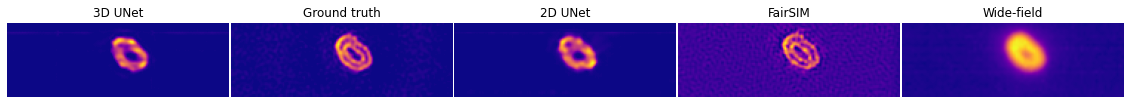

In [19]:
columns = 5
rows = 1

fig, ax = plt.subplots(rows, columns, figsize=(20, 10)) # setup the figures
plt.axis('off')
slide = 7
        
for i in range(5):
     ax[i].imshow(normalize_volume(seconddd_list[i][slide][250:300, 350:500]), cmap = 'plasma')
for i in range(5):
    ax[i].axis('off')
plt.subplots_adjust(wspace=0.01, hspace=0)

ax[0].set_title('3D UNet')
ax[1].set_title('Ground truth')
ax[2].set_title('2D UNet')
ax[3].set_title('FairSIM')
ax[4].set_title('Wide-field')

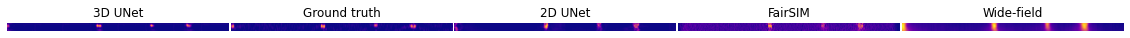

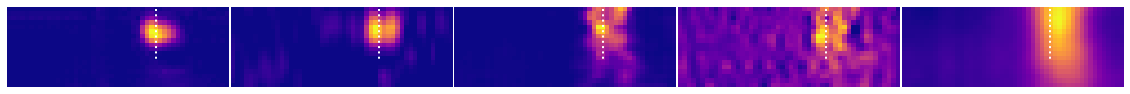

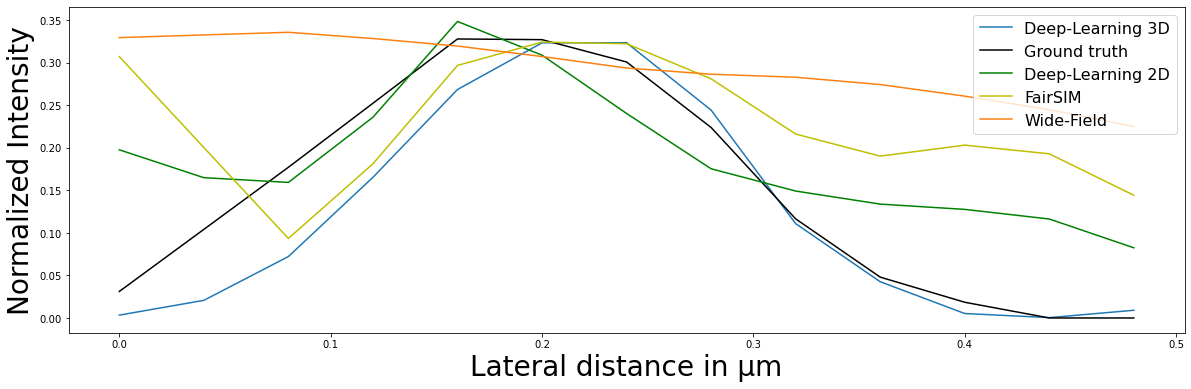

In [99]:
columns = 5
rows = 1

#######################################################################
fig_3, ax_3 = plt.subplots(rows, columns, figsize=(20, 10)) # setup the figures
#fig.tight_layout(pad=0.0)


plt.axis('off')
slide = 10
x_range = slice(300,350)
y_range = 450
for i in range(5):
    ax_3[i].imshow(normalize_volume(second_list[i][:,y_range,:]), cmap='plasma')
for i in range(5):
    ax_3[i].axis('off')
    
plt.subplots_adjust(wspace=0.01, hspace=0)
    

ax_3[0].set_title('3D UNet')
ax_3[1].set_title('Ground truth')
ax_3[2].set_title('2D UNet')
ax_3[3].set_title('FairSIM')
ax_3[4].set_title('Wide-field')

#################################################################
# zoomed in

fig, ax = plt.subplots(rows, columns, figsize=(20, 10)) # setup the figures
#fig.tight_layout(pad=0.0)
plt.axis('off')
slide = 10
x_range = slice(300,350)
y_range = 450

# # move y from the center
# length = 10
# move_x = 20
# move_y = 3
slide = 7

# profile line
# start_2 = (second_list[i][:,y_range,x_range].shape[0]//2 + move_y,move_x)
# end_2 = (second_list[i][:,y_range,x_range].shape[0]//2+move_y, move_x+length)

length = 12

x_movt = 33
y_start = 0

start_2 = (y_start,x_movt)
end_2 = (y_start+length, x_movt)

for i in range(5):
    ax[i].imshow(normalize_volume(seconddd_list[i][:,y_range,x_range]), cmap='plasma')
    ax[i].plot([start_2[1],end_2[1]],[start_2[0],end_2[0]], 'w:', lw=2) #Plot a red line across the film
#ax[0].imshow(my_axis)      
for i in range(5):
    ax[i].axis('off')
    
plt.subplots_adjust(wspace=0.01, hspace=0)
###############################################################
# intensity plot
    
profile = profile_line(seconddd_list[0][:,y_range,x_range], start_2, end_2, linewidth=1, mode='constant') #Take the profile line
profile_2 = profile_line(seconddd_list[1][:,y_range,x_range], start_2, end_2, linewidth=1, mode='constant') 
profile_3 = profile_line(seconddd_list[2][:,y_range,x_range], start_2, end_2, linewidth=1, mode='constant') 
profile_4 = profile_line(seconddd_list[3][:,y_range,x_range], start_2, end_2, linewidth=1, mode='constant') 
profile_5 = profile_line(seconddd_list[4][:,y_range,x_range], start_2, end_2, linewidth=1, mode='constant') 


################################################################
fig_2, ax_2 = plt.subplots(1, 1, figsize=(20, 6)) #Create the figures


#x1 = np.linspace(0, length, length+1, endpoint=True)*(40.96um/1024) #calibration to um using GT image info
x1 = np.linspace(0, length, length+1, endpoint=True)*(0.08/2) # (80nm/2) calibration to um using info from MBPC paper

ax_2.plot(x1,profile)
ax_2.plot(x1,profile_2, 'k-')
ax_2.plot(x1,profile_3, 'g-')
ax_2.plot(x1,profile_4, 'y-')
ax_2.plot(x1,profile_5)

# ax_2.plot(x1,profile_dic['UNET_3D'])
# ax_2.plot(x1,profile_dic['UNET_2D'], 'g-')
# ax_2.plot(x1,profile_dic['Ground_Truth'], 'k-')
# ax_2.plot(x1,profile_dic['Wide_Field'], 'y-')


# ax_2.grid()

plt.xlabel("Lateral distance in μm", fontsize=28)
plt.ylabel("Normalized Intensity", fontsize=28)
ax_2.legend(['Deep-Learning 3D', 'Ground truth', 'Deep-Learning 2D','FairSIM','Wide-Field'],  fontsize=16, loc='upper right')

In [17]:
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import normalized_root_mse as nrmse

In [27]:
def ssim_batch(img1, img2):
#     img1 = (img1*255).astype("uint32")
#     img2 = (img2*255).astype("uint32")
    img1 = (img1*255).astype("uint8")
    img2 = (img2*255).astype("uint8")
#     img1 = (img1*255).astype("float32")
#     img2 = (img2*255).astype("float32")
    return ssim(img1,img2)

In [19]:
# FOR 3d

# print('psnr: ',psnr(second_list[0],second_list[1]))
# print('ssim: ',ssim_batch(second_list[0]/np.max(second_list[0]), second_list[1]/np.max(second_list[1])) )

## Volume Comparison

In [20]:
# FOR 3d

print('psnr: ',psnr(seconddd_list[0],seconddd_list[1]))
print('ssim: ',ssim(seconddd_list[0],seconddd_list[1]))

psnr:  28.967041410894197
ssim:  0.8727106726947216


In [21]:
# FOR 2d

print('psnr: ',psnr(seconddd_list[2],seconddd_list[1]))
print('ssim: ',ssim(seconddd_list[2],seconddd_list[1]))

psnr:  27.620540797292943
ssim:  0.8463978056767293


In [39]:
# FOR FairSIM

print('psnr: ',psnr(seconddd_list[3],seconddd_list[1]))
print('ssim: ',ssim(seconddd_list[3],seconddd_list[1]))

psnr:  21.821021004794893
ssim:  0.8138551429004852


## Local Comparison
--------

## Lateral 

In [66]:
# FOR 2d

print('psnr: ',psnr(normalize_volume(seconddd_list[2][slide]),normalize_volume(seconddd_list[1][slide])))
print('ssim: ',ssim(normalize_volume(seconddd_list[2][slide]),normalize_volume(seconddd_list[1][slide])))

psnr:  26.29537791561539
ssim:  0.8186808018845482


In [80]:
# FOR 3d

print('psnr: ',psnr(normalize_volume(seconddd_list[1][slide]),normalize_volume(seconddd_list[0][slide]) ))
print('ssim: ',ssim(normalize_volume(seconddd_list[1][slide]),normalize_volume(seconddd_list[0][slide]) ))

psnr:  25.67910278049817
ssim:  0.8267932454312341


In [83]:
# FOR FairSIM

print('psnr: ',psnr(seconddd_list[3][slide],seconddd_list[1][slide]))
print('ssim: ',3*ssim(seconddd_list[3][slide].astype(np.float32),seconddd_list[1][slide].astype(np.float32), multichannel=True))


psnr:  22.57383307773042
ssim:  0.8669541784009629


## Axial 

In [40]:
# FOR 2d

print('psnr: ',psnr(secondd_list[1][:,y_range,x_range],secondd_list[2][:,y_range,x_range] ) )
print('ssim: ',ssim(secondd_list[1][:,y_range,x_range],secondd_list[2][:,y_range,x_range] ) )

psnr:  20.021192922255274
ssim:  0.636516536200174


In [41]:
# FOR 3d

print('psnr: ',psnr(secondd_list[1][:,y_range,x_range],secondd_list[0][:,y_range,x_range]) )
print('ssim: ',ssim(secondd_list[1][:,y_range,x_range],secondd_list[0][:,y_range,x_range]) )

psnr:  24.42571024558259
ssim:  0.7648535710502943


In [56]:
print('psnr: ',psnr(seconddd_list[3][:,y_range,x_range],seconddd_list[1][:,y_range,x_range], data_range = 1.0) )
print('ssim: ',3*ssim(seconddd_list[3][:,y_range,x_range],seconddd_list[1][:,y_range,x_range], data_range = 1.0) )

# print('psnr: ',psnr(secondd_list[3],secondd_list[1], data_range=1.0))
# print('ssim: ',ssim(second_list[3]/np.max(second_list[3]),second_list[1], data_range=1.0))

psnr:  20.644529901678304
ssim:  0.5632411877267216


In [52]:
seconddd_list[3][:,y_range,x_range].dtype

dtype('float32')